In [1]:
import pandas as pd
import numpy as np
import requests as r
import os
import tweepy as tp
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,growth,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,Africa,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,20562,3261
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,12041,2158
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,56848,16716
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,28226,4429
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,32467,7711


# Data Analysis and Visualization 


## Research Questions:
### 1. What names of dogs are most popular?


In [4]:
name_list = df['name'].value_counts().head(10)
name_list

Oliver       11
Charlie      11
Cooper       10
Lucy         10
Tucker        9
Penny         9
Winston       8
Sadie         8
Toby          8
Christmas     8
Name: name, dtype: int64

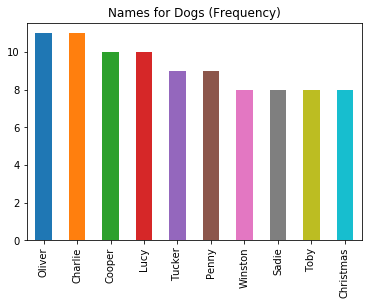

In [5]:
#Visualization
name_list.plot(kind='bar', title = 'Names for Dogs (Frequency)');

According to the number of frequencies of top 10 dog names, we can see that Oliver and Charlie are the most popular names. 

For a better visualization of all the dogs names, I would like to build a word cloud to show the popularity of names. 
The larger the word is, the more dogs are called by that particular name.

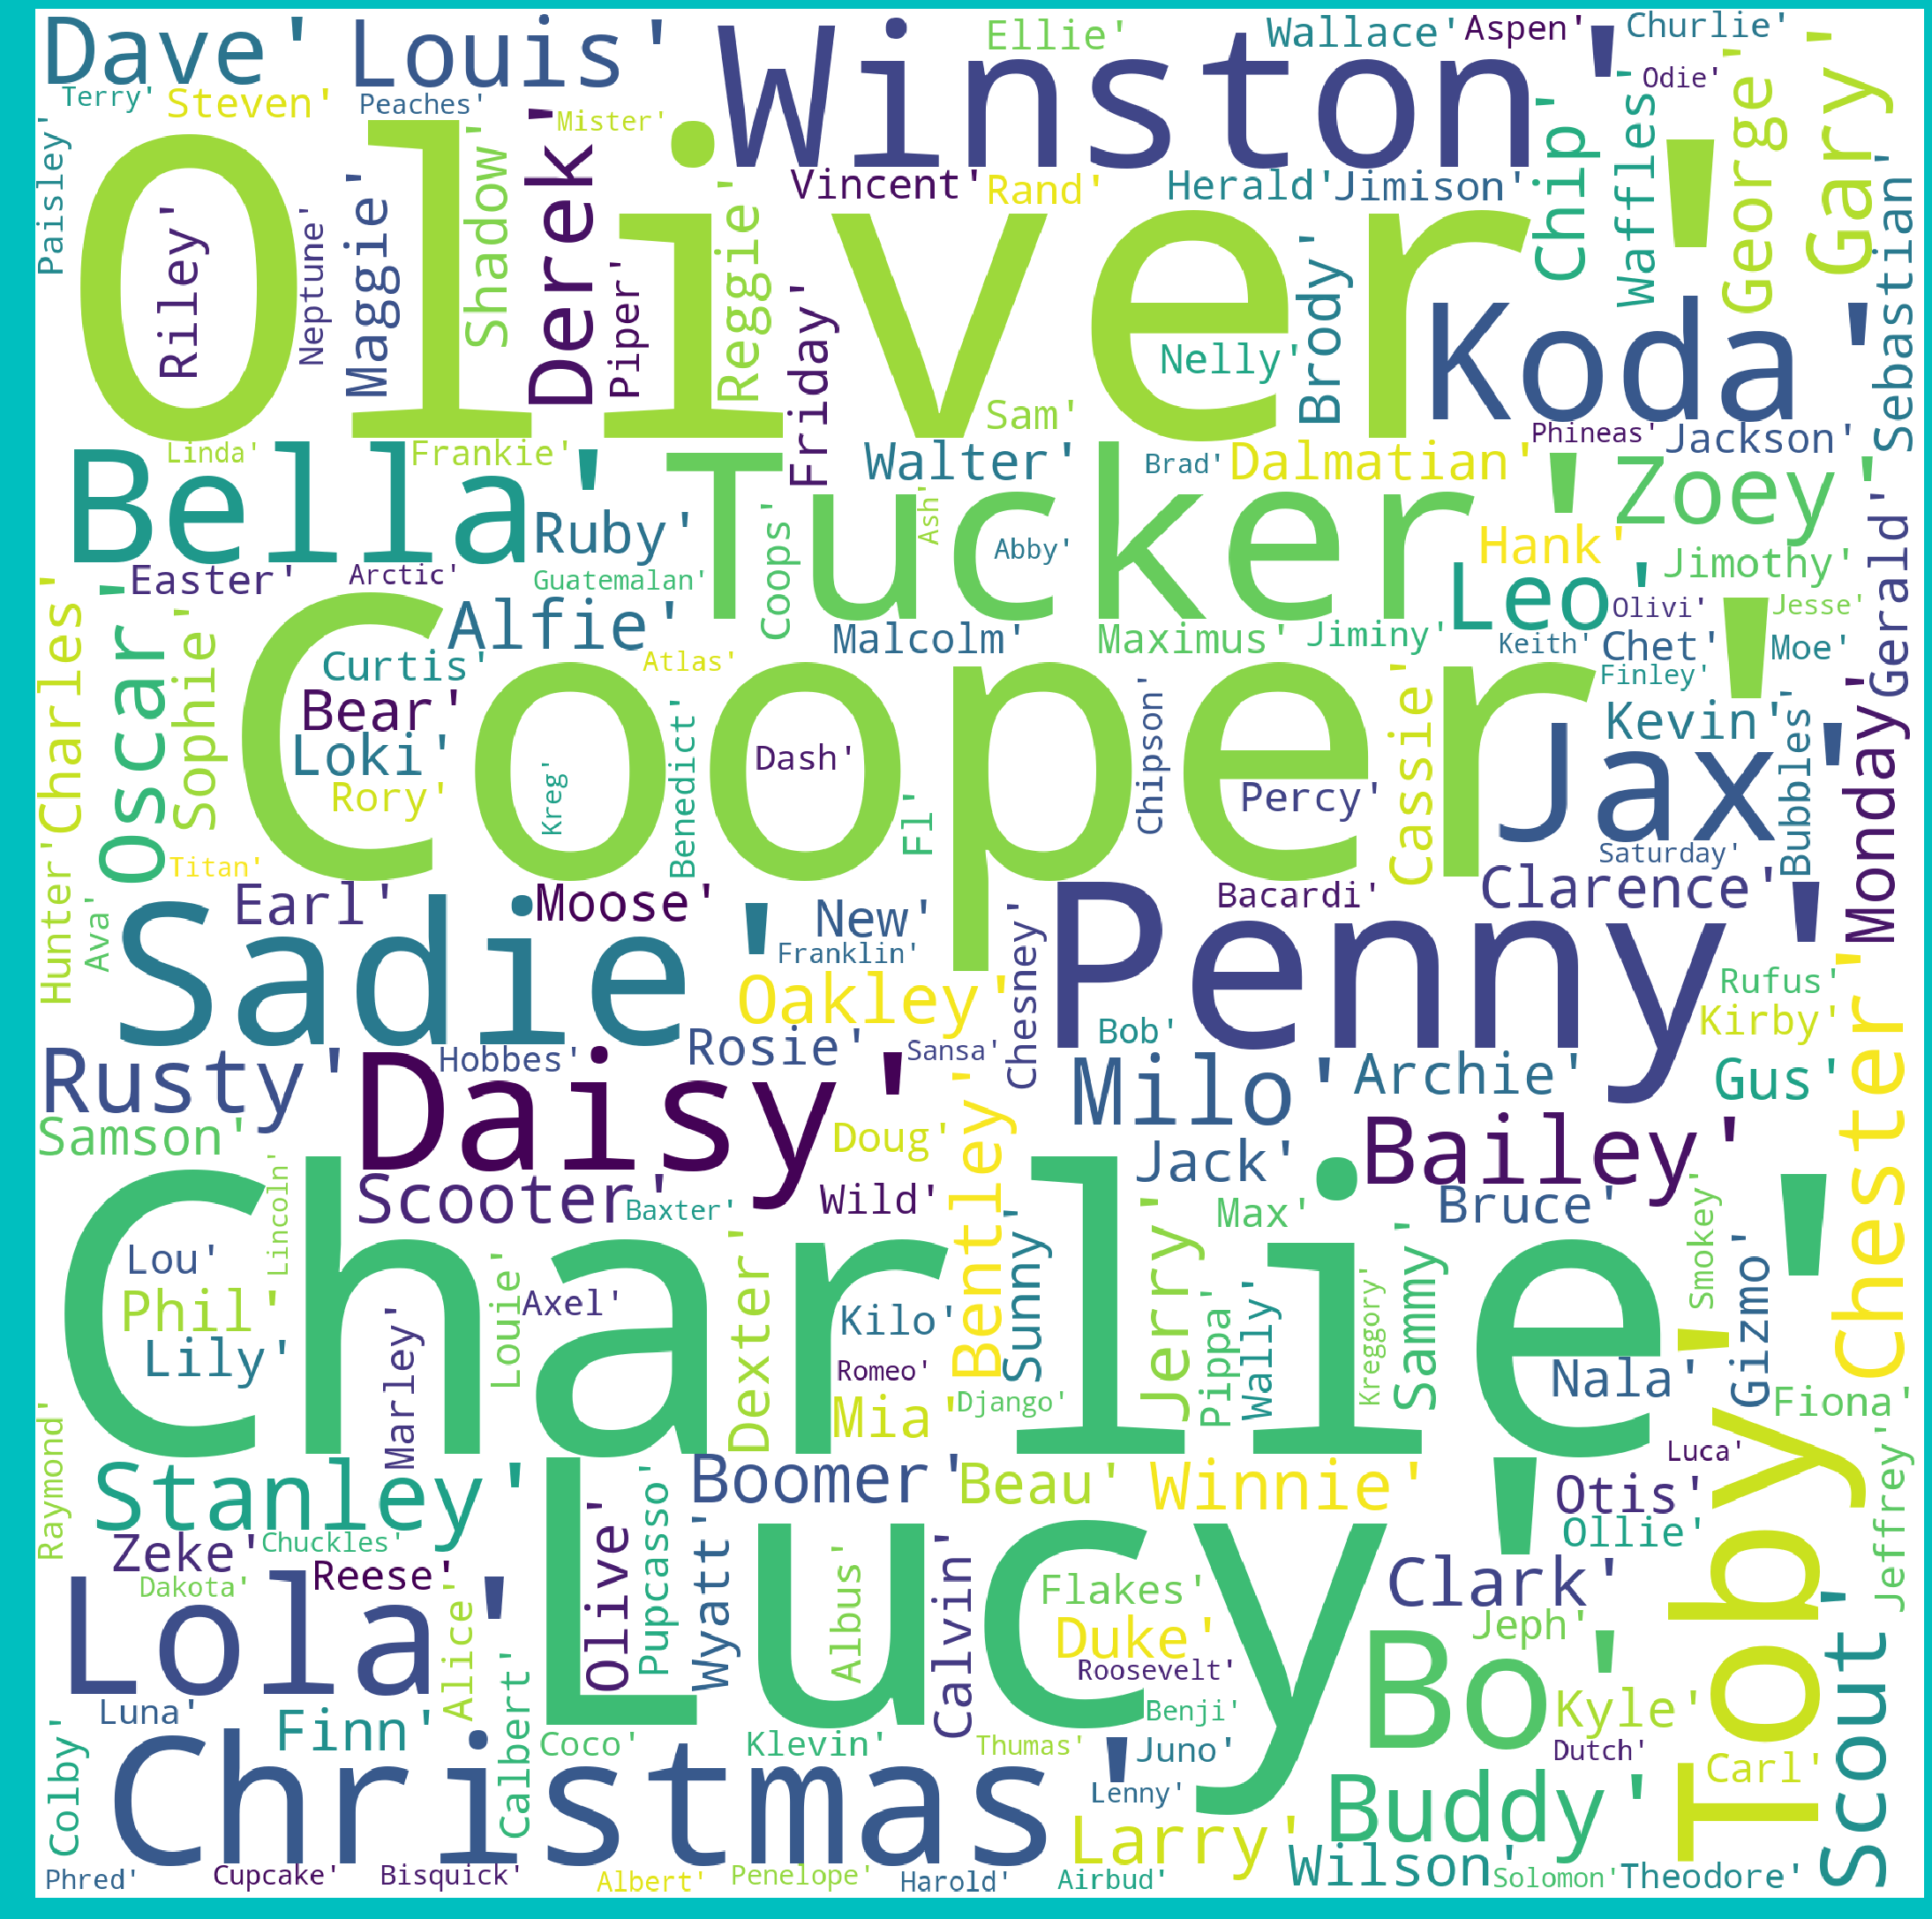

In [6]:
names_list = df.name.value_counts().index.tolist()
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = names_list
wordcloud = WordCloud(
    width = 2000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'c',
    edgecolor = 'c')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 2. What is the distribution of the dogs' stages?

In [7]:
stages = df['growth'].value_counts()

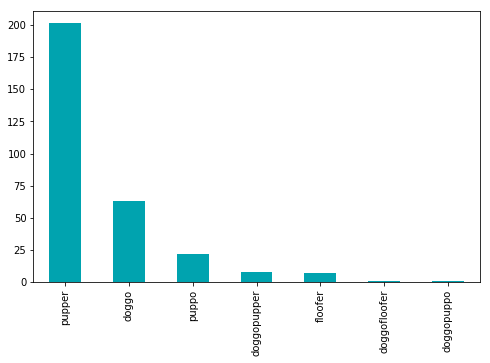

In [8]:
stages.plot(kind='bar',figsize=(8,5),color='#00a3af');

Most of the dogs are at the pupper stage.

### 3. Do rating numerator and denominator have correlations to favoriate counts and retweet counts?


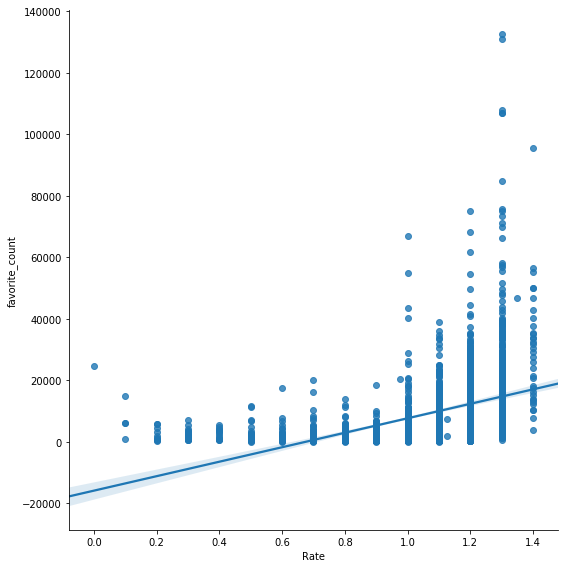

In [9]:
Rate = df[['rating_numerator','rating_denominator','retweet_count','favorite_count']].dropna()
Rate['Rate']=df['rating_numerator'] / df['rating_denominator']
Rate = Rate[Rate['Rate']<1.5]
sns.lmplot(x='Rate', y='favorite_count',data=Rate,size=8)

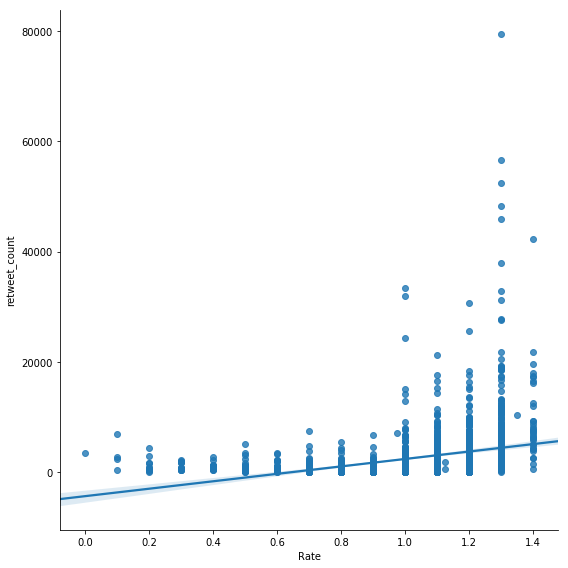

In [10]:
sns.lmplot(x='Rate', y='retweet_count',data=Rate,size=8);

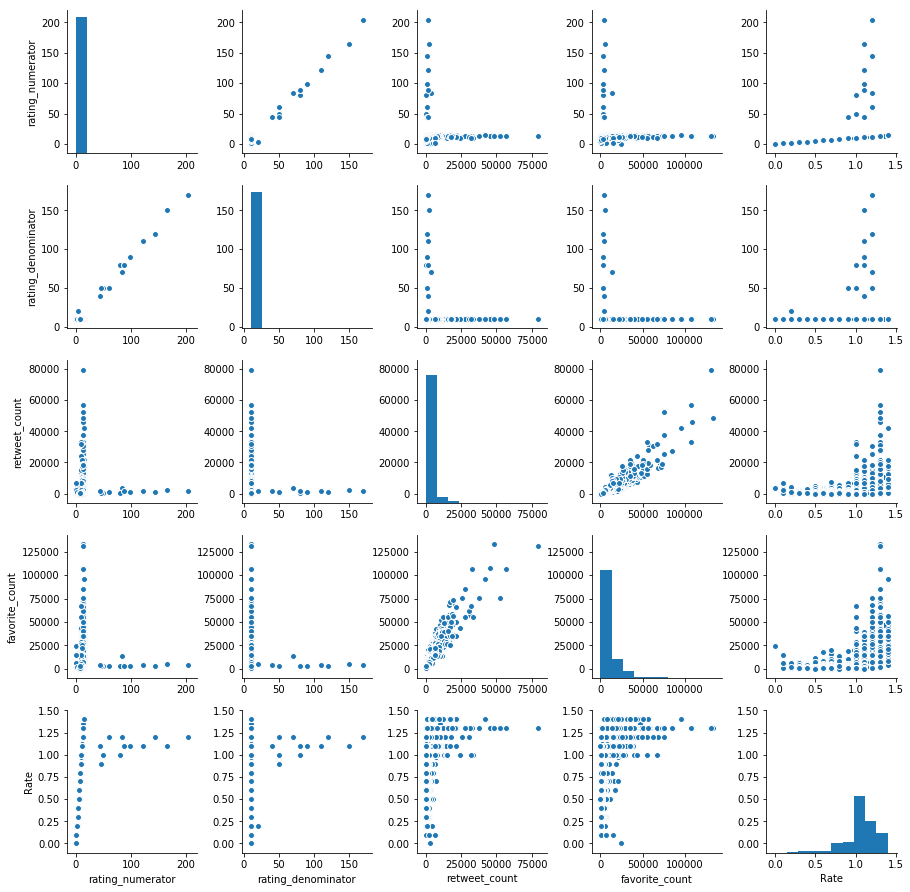

In [11]:

sns.pairplot(Rate)


According to the plots, the rate is positive correlated to the retweet count and favorite count.